In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Handling Missing Values and basic stats:

In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data[data.duplicated()].any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

# Checking Null values

In [8]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Checking for unique values

In [9]:
data.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [10]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [11]:
data["R&D Spend"].unique()

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05])

In [12]:
data["Administration"].unique()

array([136897.8 , 151377.59, 101145.55, 118671.85,  91391.77,  99814.71,
       147198.87, 145530.06, 148718.95, 108679.17, 110594.11,  91790.61,
       127320.38, 135495.07, 156547.42, 122616.84, 121597.55, 145077.58,
       114175.79, 153514.11, 113867.3 , 153773.43, 122782.75, 105751.03,
        99281.34, 139553.16, 144135.98, 127864.55, 182645.56, 153032.06,
       115641.28, 152701.92, 129219.61, 103057.49, 157693.92,  85047.44,
       127056.21,  51283.14,  65947.93,  82982.09, 118546.05,  84710.77,
        96189.63, 127382.3 , 154806.14, 124153.04, 115816.21, 135426.92,
        51743.15, 116983.8 ])

In [13]:
# Outlier Treatment

numerical=data.select_dtypes(exclude="object")

In [14]:
numerical.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [15]:
outlier = numerical.drop("Profit",axis=1)

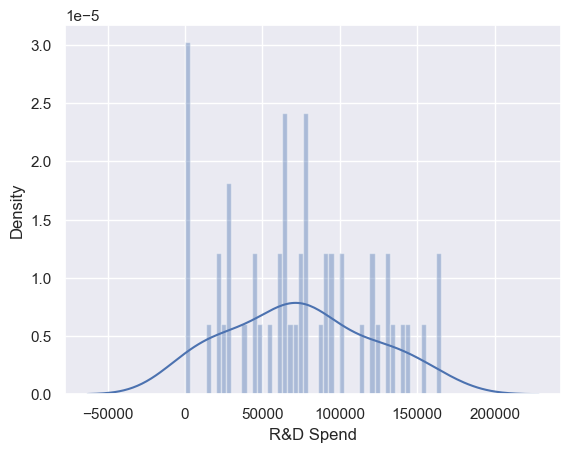

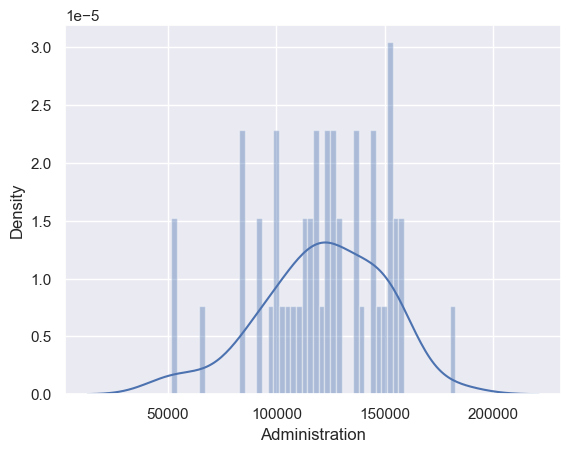

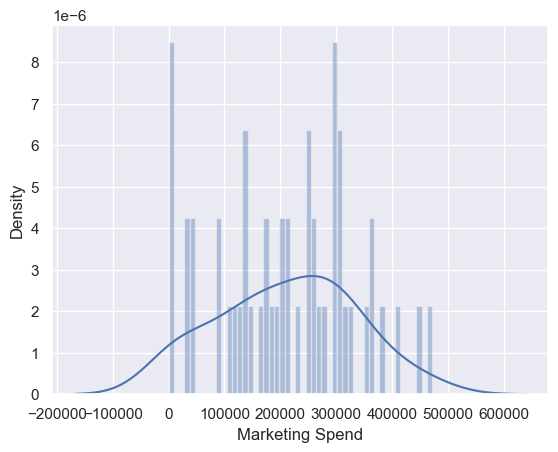

In [16]:
def distplot(df,col):
    sns.distplot(df[col],bins=50, kde=True)
    plt.show()

for i in outlier:
    distplot(numerical,i)

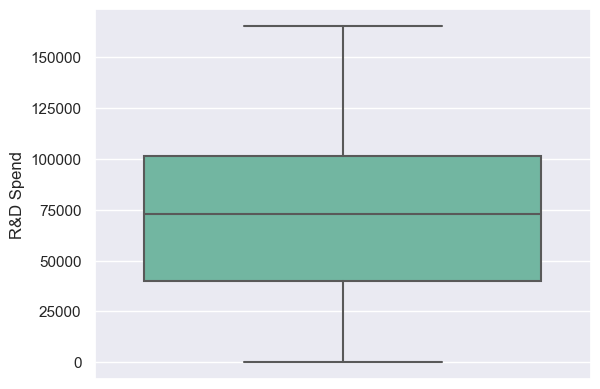

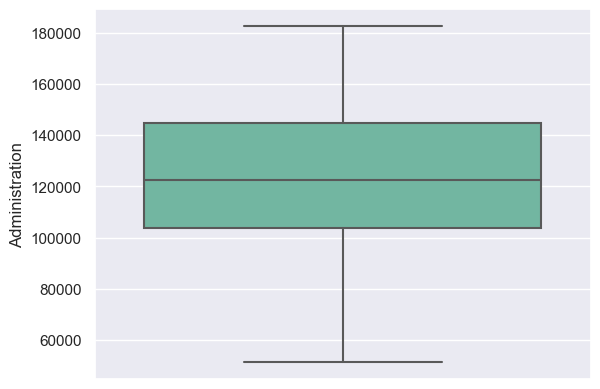

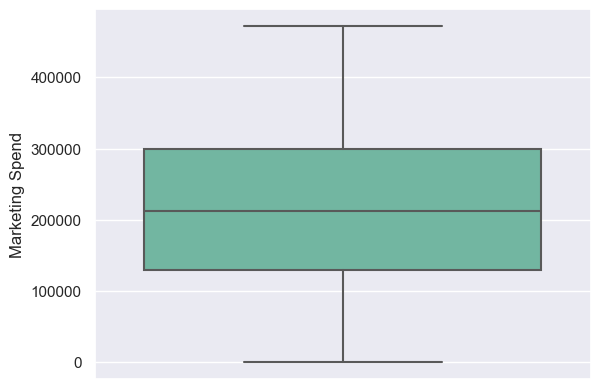

In [17]:
def boxplots(df,col):
    sns.boxplot(y=col,data=data,palette = "Set2")
    plt.show()

for col in outlier:
    boxplots(data,col)

# - 1 checking Linearity

# BiaVariate Analyisis: 

### To check Linearity

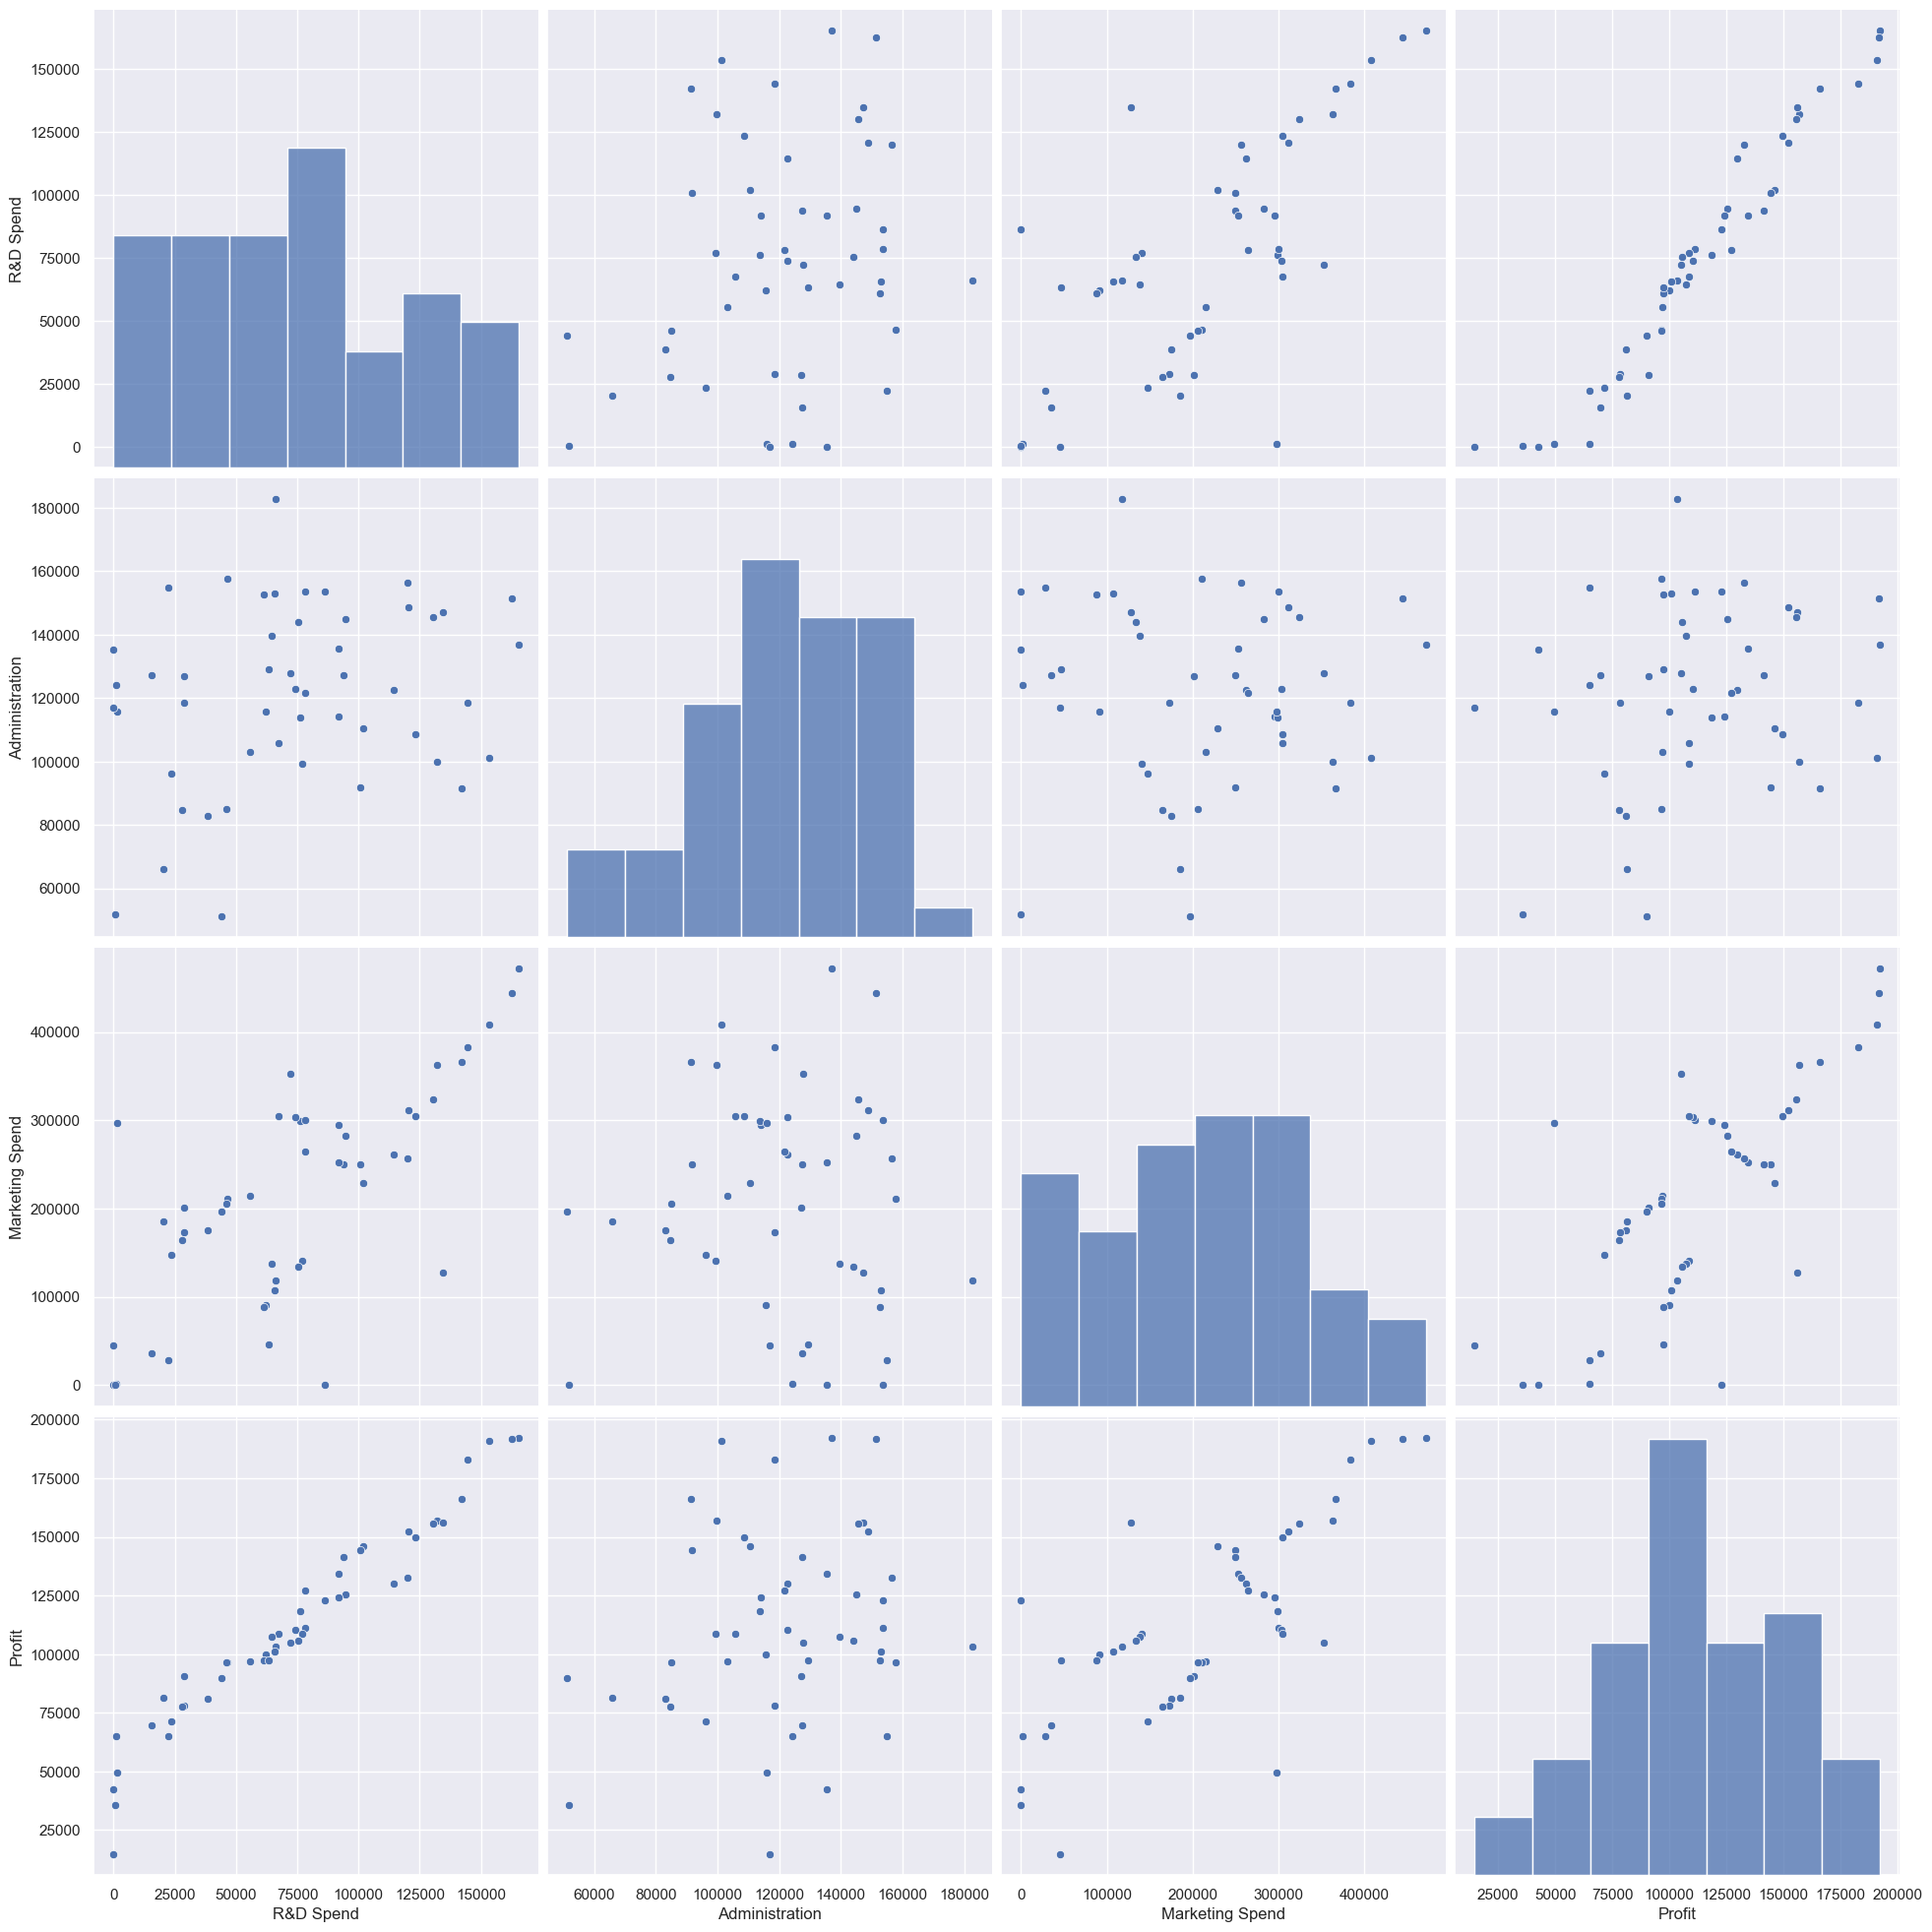

In [18]:
sns.pairplot(data,size=5, kind = "scatter")

In [19]:
numerical.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

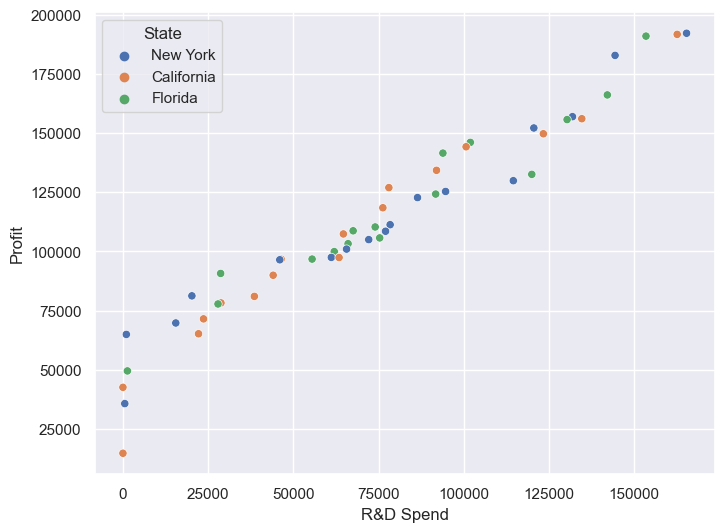

In [20]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=data["R&D Spend"], y= data["Profit"], hue = data["State"])

<AxesSubplot:xlabel='Administration', ylabel='Profit'>

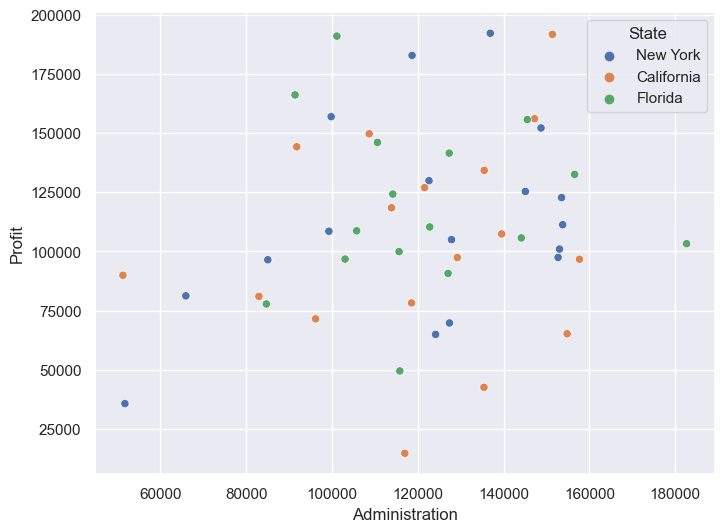

In [21]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=data["Administration"], y= data["Profit"], hue = data["State"])

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

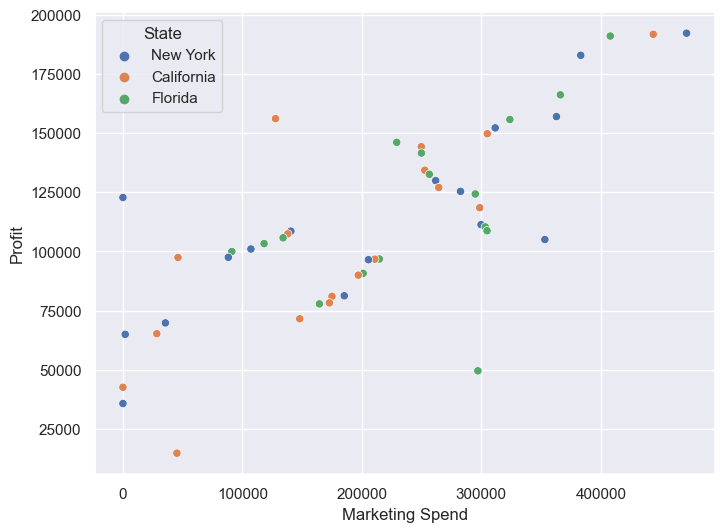

In [22]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=data["Marketing Spend"], y= data["Profit"], hue = data["State"])

# Encoing

In [23]:
data = pd.get_dummies(data,columns=["State"],drop_first="True")

In [24]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


# Splitting the data to train and test 

- We need to do feature scaling only on independent varaible and not on target variable

In [25]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [26]:
x = data.drop("Profit",axis = 1)
y = data["Profit"]

In [27]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [28]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

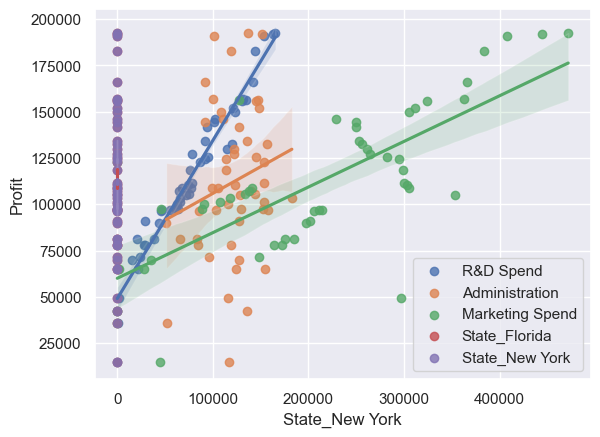

In [29]:
for col in x.columns:
    sns.regplot(x=x[col],y=y, label = col)
    plt.xlabel
    plt.legend()

# 3 Feature Scaling:

### Feature scaling is done only on independent variables.  We need to perform Feature scaling after train test split to avoid data leakage


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()

In [32]:
sc_x=sc.fit_transform(x)
sc_x=pd.DataFrame(sc_x)


In [33]:
sc_x.head()

,0,1,2,3,4
0,2.016411,0.560753,2.153943,-0.685994,1.393261
1,1.955860,1.082807,1.923600,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.457738,-0.717741


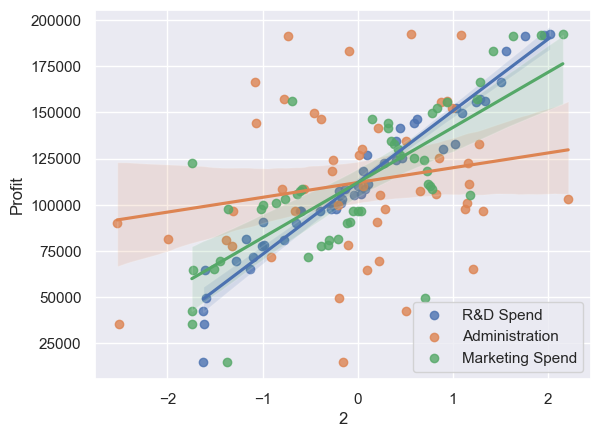

In [34]:
sns.regplot(x=sc_x[0],y=y, label = "R&D Spend")
sns.regplot(x=sc_x[1],y=y,label = "Administration")
sns.regplot(x=sc_x[2],y=y,label = "Marketing Spend")
plt.xlabel
plt.legend()

# Multicollinerity Check

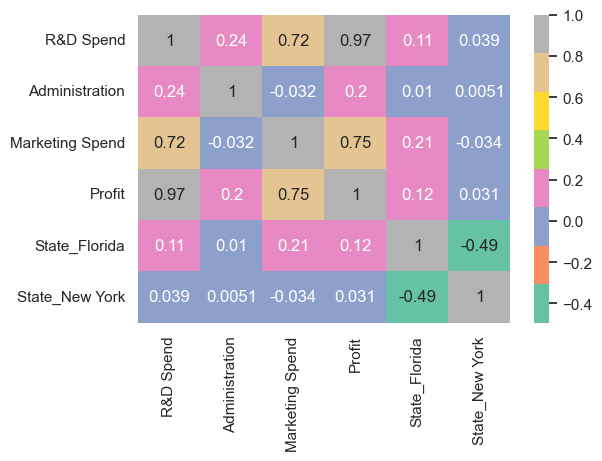

In [35]:
# finding correlation
plt.figure(figsize=(6,4))
corr = data.corr()
sns.heatmap(corr,annot= True,cmap = "Set2")
plt.show()

# Variation Inflation Factor 

- A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model.
- A VIF of 1 will mean that the variables are not correlated; a VIF between 1 and 5 shows that variables are moderately correlated, and a VIF between 5 and 10 will mean that variables are highly correlated
- if VIF > 5 then it is highly correlated. WE will drop the variable having highest variation. After performing perform VIF again to check the change in corelations

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [41]:
variable = sc_x
data1={'VIF':[variance_inflation_factor(variable,i) for i in range(len(sc_x.columns))],"features":x.columns}

vif = pd.DataFrame(data1)


In [42]:
vif

,VIF,features
0,2.495511,R&D Spend
1,1.177766,Administration
2,2.416797,Marketing Spend
3,1.387641,State_Florida
4,1.335061,State_New York


In [39]:
# As above values are below 5 we consider there is no multicolinerity. If there was we would have droped the column

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

In [82]:
print(x_train.shape,x_test.shape,y_test.shape)

(35, 5) (15, 5) (15,)


# Approch 1 Multiple Linear Regression

$ y = B0*B1.x1 +B2.x2 +..... Bn.xn + e $

- e = error
- Bo = Intercept
- B1, B2 = Coeffiecent or slopes
- y = dependent variable
- x = independent variables

### The difference between actual value and models eatimate are residual (error)
### Lower the value of residuals model is good estimator

# Mean Absolute Error : 
The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

- Easy to understand, because it is average of error
- Can handle outliers well

# Mean squared error (MSE): 
Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.
- Interpreation is difficult as square value is recieved
- Not robust to outliers 

# Root Mean Square Error : 
Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.
- Gives result in same unit as input
- Not robust to outliers

# R2:
The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.
if R2 score is 1 there is overfitting and 0 underfitting

# Adjusted R2

Adjusted R squared is a modified version of R square, and it is adjusted for the number of independent variables in the model, and it will always be less than or equal to R².In the formula below n is the number of observations in the data and k is the number of the independent variables in the data.

# Training with LR

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lr = LinearRegression()

In [85]:
lr.fit(x_train,y_train)

LinearRegression()

In [86]:
# Lets check slope and intercept value

intercept = lr.intercept_
slope = lr.coef_

print("Intercept", intercept.round(3))
print("slope", slope.round(3))

Intercept 42359.532
slope [8.010000e-01 2.000000e-02 3.500000e-02 5.327994e+03 2.210460e+02]


In [87]:
# The slope and intercept if calc manually it will give value of depended varaible by formula y=B0*B1.x1.....BnXn+e

In [88]:
# Predict profit with LR

In [89]:
x_train_predict= lr.predict(x_train)
x_test_predict= lr.predict(x_test)

In [90]:
#   # Validate the actual price of the test data and predicted price (using square loss functionb)

In [91]:
from sklearn.metrics import r2_score

In [92]:
Train_accuracy= r2_score(y_train,x_train_predict)
Test_accuracy = r2_score(y_test,x_test_predict)

print("Train_accuracy", Train_accuracy)
print("Test_accuracy", Test_accuracy)

Train_accuracy 0.9517559349311887
Test_accuracy 0.9241937845107013


<AxesSubplot:xlabel='Profit', ylabel='Density'>

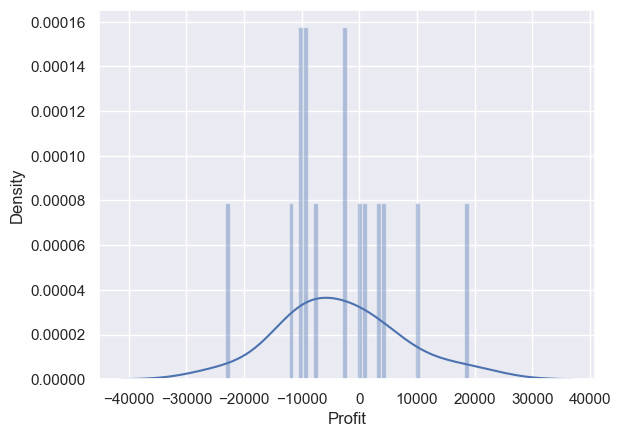

In [97]:
## Normality of Residual

sns.distplot(y_test - x_test_predict, bins=50)

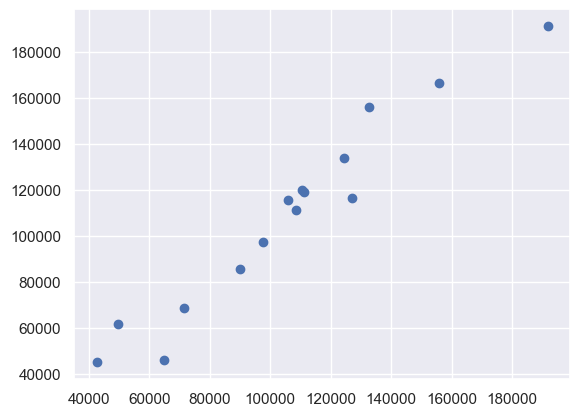

In [101]:
plt.scatter(y_test,x_test_predict)

In [102]:
residual = y_test - x_test_predict

print("Skewness",residual.skew())
print("Kurtosis", residual.kurtosis())

Skewness 0.36543878341116104
Kurtosis 0.7690107195152835


# No Autocorelation of error- plotting all residual vales should not give any pattern. We need neg autocorrelation. No relation exit between the residuals

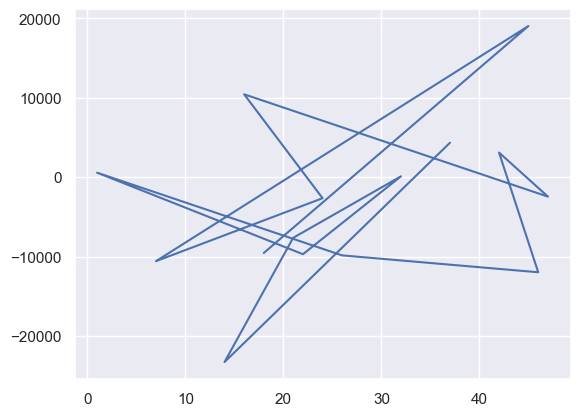

In [107]:
plt.plot(residual)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

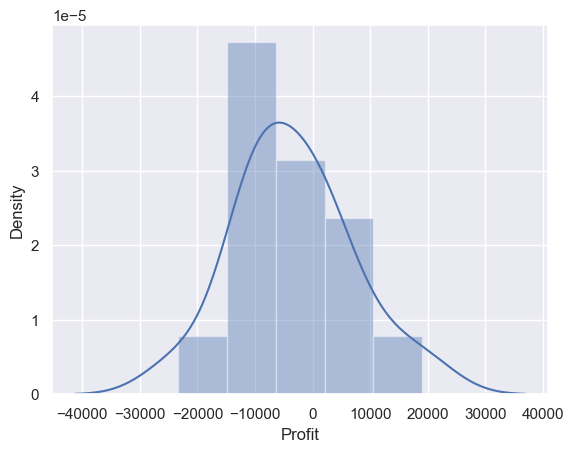

In [111]:
sns.distplot(residual,kde= True)

# error Evaluation metrics

In [124]:
from sklearn import metrics

In [126]:
print("MAE: ",metrics.mean_absolute_error(y_test,x_test_predict))

MAE:  8353.874382822254


In [128]:
print("Mean Absolute Percent Error",metrics.mean_absolute_error(y_test,x_test_predict)/100)

Mean Absolute Percent Error 83.53874382822254


In [130]:
print("MSE:", metrics.mean_squared_error(y_test,x_test_predict) )

MSE: 110145720.56936163


In [134]:
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,x_test_predict)))

RMSE: 10495.033138078299


# Approch 2 - OLS Method

In [93]:
from statsmodels.regression.linear_model import OLS

import statsmodels.regression.linear_model as smf

In [94]:
reg_model = smf.OLS(endog =y_train,exog=x_train).fit()

In [96]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              632.3
Date:                Thu, 20 Jul 2023   Prob (F-statistic):                    1.92e-29
Time:                        17:16:28   Log-Likelihood:                         -377.80
No. Observations:                  35   AIC:                                      765.6
Df Residuals:                      30   BIC:                                      773.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7241      0.076      9.575      0.000       0.570       0.879
Administration      0.2945      0.038      7.797      0.000       0.217       0.372
Marketing Spend     0.0831      0.026      3.190      0.003       0.030       0.136
State_Florida    1.101e+04   5465.161      2.015      0.053    -151.429    2.22e+04
State_New York   5257.9366   5014.238      1.049      0.303   -4982.505    1.55e+04
==============================================================================
Omnibus:                        0.291   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.379
Skew:                          -0.194   Prob(JB):                        0.828
Kurtosis:                       2.669   Cond. No.                     8.28e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    
## Assumptions:

- 1 Linearity - Satisfied
- 2 Normality of Residual - Satisfied
- 3 Homoscedasticity - satisfied( no outliers and residual is normally distributed)
- 4 No auto correlation - satisfied
- 5 no or little multicollenerity - satisfied
- 6  No endogenity problem - satisfied

# Regularization:
- Overfitting is a phenomenon that occurs when a Machine Learning model is constraint to training set and not able to perform well on unseen data.

-The regularization comes into the picture, which shrinks or regularizes these learned estimates towards zero, by adding a loss function with optimizing parameters to make a model that can predict the accurate value of Y.

- Regularization is a technique used to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting. The commonly used regularization techniques are :

# Ridge regression:

lamba >= 0 os a complexity parameter that controls the amount of shrinkage. Larger the value of lambda greatere the amount of shrinkage


- In Statistics, it is known as the L-2 norm.

👉 In this technique, the cost function is altered by adding the penalty term (shrinkage term), which multiplies the lambda with the squared weight of each individual feature. the penalty term regularizes the coefficients of the model, and hence ridge regression reduces the magnitudes of the coefficients that help to decrease the complexity of the model.

# Usage:

- When we have the independent variables which are having high collinearity (problem of ) between them, at that time general linear or polynomial regression will fail so to solve such problems, Ridge regression can be used.
- If we have more parameters than the samples, then Ridge regression helps to solve the problems.

# Lasso Regression: 
- it is similar to the Ridge Regression except that the penalty term includes the absolute weights instead of a square of weights.

- In statistics, it is known as the L-1 norm.

👉 In this technique, the L1 penalty has the eﬀect of forcing some of the coeﬃcient estimates to be exactly equal to zero which means there is a complete removal of some of the features for model evaluation when the tuning parameter λ is suﬃciently large. Therefore, the lasso method also performs Feature selection and is said to yield sparse models.

### Disadvantage:

 Limitation of Lasso Regression:

- Problems with some types of Dataset: If the number of predictors is greater than the number of data points, Lasso will pick at most n predictors as non-zero, even if all predictors are relevant.
- Multicollinearity Problem: If there are two or more highly collinear variables then LASSO regression selects one of them randomly which is not good for the interpretation of our model.

# In This case no overfitting issue, still trying

In [116]:
from sklearn.linear_model import Lasso

In [117]:
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print("lasso model",(lasso.coef_))

lasso model [8.01207462e-01 1.96276308e-02 3.51978665e-02 5.32695947e+03
 2.20125249e+02]


In [119]:
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

In [120]:
print("Training Accuracy :",r2_score(y_train,y_pred_train_lasso))
print("Testing Accuracy :",r2_score(y_test,y_pred_test_lasso))

Training Accuracy : 0.9517559348109744
Testing Accuracy : 0.9241969817600444
